# (Bay Wheels's trip data Explanatory analysis)
## by (Amal Meer)

## Investigation Overview

> This data worth looking for the factors that increased revenue, i.e. the trip counts increased when these features exist.

## Dataset Overview

> This dataset contains information about Bay Wheels's trip during 2017.
There're more than 500000 records. Each record represents the trip information (including time, station, bike, user info.)

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
trips = pd.read_csv('2017-fordgobike-tripdata.csv', sep = ';')

# Convert IDs to strings.
trips.start_station_id = trips.start_station_id.apply(str)
trips.end_station_id = trips.end_station_id.apply(str)
trips.bike_id = trips.bike_id.apply(str);

# Conver times to timestamp
trips.start_time = pd.to_datetime(trips.start_time)
trips.end_time = pd.to_datetime(trips.end_time)

# Convert user_type to categorical data typr
classes = ['Subscriber','Customer']
ordered_classes = pd.api.types.CategoricalDtype(ordered = True, categories = classes)
trips.user_type = trips.user_type.astype(ordered_classes)

# Extract the day and start hour of the week and add it to the dataframe
trips['week_day'] = trips.start_time.dt.dayofweek
week_days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
trips.week_day = trips.week_day.replace([0,1,2,3,4,5,6], week_days)

trips['start_hour'] = trips.start_time.dt.hour


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (The total number of trips for each user type)

> There are 2 types of users. subscriber (members) and customer (casual user). subscriber has more number of trips, around 4 times more than the casual customer. subscriber must be given more attention as they are a core for this busniess. The bar chart below show this difference.

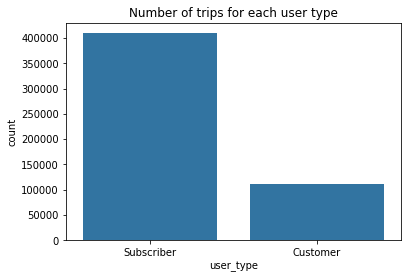

In [6]:
#Define a base color as it's used frequently
base_color = sb.color_palette()[0]

# See the distribution of the user type
sb.countplot(data = trips, x = 'user_type', color = base_color)

plt.title('Number of trips for each user type');

## (trip count on Week days for each  user type)

> The number of trips by subscriber are more than those taken by casual customers in general. Also, the number of trips by subscriber decreased on the weekend, while the number of the casual customers increased on the weekends. This might indicates that subscriber pay for membership as they use the bike all the week days to get to their work, while casual users use anothr mean of transport to get to their work, and use bikes for other usage.

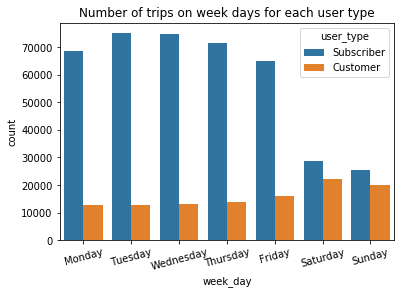

In [7]:
# Let's explore if the member user has relation with the week_day or the hour
sb.countplot(data = trips, x = 'week_day', hue = 'user_type', order = week_days)
plt.xticks(rotation = 15)
plt.title('Number of trips on week days for each user type');

## (The start hour of trips on each day)

The weekends have different trend than the work days. On weekends, more bikes are used between 10AM to 5PM, less are used on the start and end of the day, while the work days behave the opposite, most bikes are used in the start and end of the work day (8 AM, 5PM)

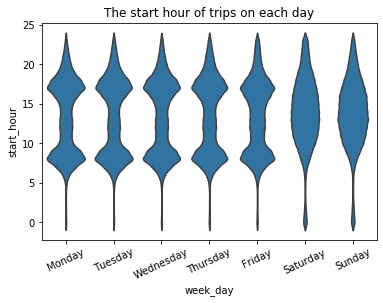

In [8]:
sb.violinplot(data = trips, x = 'week_day', y = 'start_hour', color = base_color, order = week_days, inner = None)
plt.xticks(rotation = 25);
plt.title('The start hour of trips on each day');

## (The start hour of trips on each day for each category type)

The subscribers use the bikes early on weekdays, and late on weekend, while the customer behave the opposite. In general, subscriber usually start much earlier. This emphasize that subscriber use the bikes to get to their work.

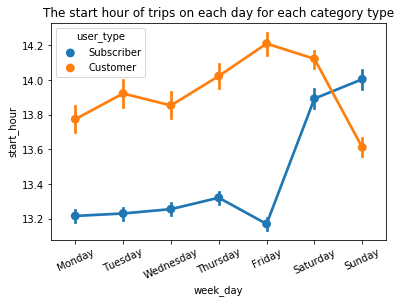

In [9]:
sb.pointplot(data = trips, x = 'week_day', y = 'start_hour' , hue = 'user_type', order = week_days)
plt.xticks(rotation = 25);
plt.title('The start hour of trips on each day for each category type');

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!